In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.dates as mdates
from wordcloud import WordCloud
import matplotlib as mpl
import numpy as np
from nltk.corpus import stopwords
import seaborn as sns

import torch

from transformers import pipeline, AutoTokenizer

## Analisis de sentimiento de los comentarios


En esta sección, vamos a explorar el sentimiento de los comentarios utilizando un modelo llamado __pysentimiento/robertuito-sentiment-analysis__, del hub de __HuggingFace__. Esta modelo nos ayudará a clasificar los comentarios con una escala de "positivo", "neutro", y "negativo". 


Una vez que hayamos aplicado el análisis de sentimiento, crearemos un gráfico de barras para visualizar la distribución del sentimiento, esto nos dará una idea del sentimiento general de la audiencia y nos ayudará a comprender sus pensamientos sobre los videos. Así que, ¡sumergámonos en el código y veamos qué conclusiones podemos obtener del análisis de sentimiento!

In [10]:
import re
import unicodedata
from pysentimiento import create_analyzer

def clean_text(text):
    # Convierte el texto a minúsculas
    text = text.lower()

    # Elimina las puntiaciones
    text = re.sub(r'[^\w\s]', '', text)

    # Remueve los acentos
    text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8')

    return text

def sentiment_analysis(df, column, threshold=0.95):
    """
    Realiza un análisis de sentimiento de los comentarios en un dataframe usando un modelo de Huggingface.
    
    Args:
    - df (pandas.DataFrame): dataframe con los comentarios en formato de texto.
    - columna (str): nombre de la columna del dataframe que contiene los comentarios.
    
    Returns:
    - pandas.DataFrame: dataframe con una nueva columna "sentimiento" que indica el sentimiento de cada comentario
                        ("positivo", "negativo" o "neutro").
    """

    df = df.dropna()

    analyzer = create_analyzer(task="sentiment", lang="es")

    df[column] = df[column].apply(clean_text)

    df['sentimiento'] = df[column].apply(lambda x: analyzer.predict(x).output)

    return df


Creamos una nueva columna con la clasifiación de sentimientos de cada comentario.

In [12]:
# Ahora procedemos a cambiar los valores de la columna sentimiento, de "POS" -> "positivo".
def reemplazar(x):
    if x == 'POS':
        return 'Positivo'
    elif x == 'NEG':
        return 'Negativo'
    elif x == 'NEU':
        return 'Neutro'
    else:
        return np.NaN

In [ ]:
# Esta celda solo será ejecutada si no se quiere utilizar el archivo previamente procesado

# comments_df = sentiment_analysis(comments_df, 'comment_text', threshold=0.95)

# comments_df['sentimiento'] = comments_df['sentimiento'].apply(reemplazar)

Como ya hemos ejecutado esta tarea, vamos entonces a cargar el resultado:

In [13]:
comments_xls = 'Comentarios-FreeCover-Sentimiento(v2).xlsx'
comments_path = os.path.join('Comentarios',comments_xls)
comments_df = pd.read_excel(comments_path, index_col=0)
comments_df['sentimiento'] = comments_df['sentimiento'].apply(reemplazar)

## Revisión de los resultados


Veamos algunos ejemplos de la salida del procesamiento de analisis de sentimiento con el modelo sin __"Fine-Tuning"__.


Primero veamos algunos comentarios que sean clasificados como positivos:

In [5]:
comments_df

,video_id,video_title,video_description,video_date,comment_text,comment_date,sentimiento
0,bI-w7HaeJPU,[Free Cover Venezuela] Amor Sincero / La estoy...,Disfruta de “ #FreeCover ” en tu plataforma fa...,2017-10-22 20:49:49,inviten a guzman musica,2017-10-22 20:49:49,Neutro
1,bI-w7HaeJPU,[Free Cover Venezuela] Amor Sincero / La estoy...,Disfruta de “ #FreeCover ” en tu plataforma fa...,2017-10-22 20:49:49,debo reconocer que este free cover y el de jua...,2017-10-22 20:49:49,Positivo
2,bI-w7HaeJPU,[Free Cover Venezuela] Amor Sincero / La estoy...,Disfruta de “ #FreeCover ” en tu plataforma fa...,2017-10-22 20:49:49,jabon sincero,2017-10-22 20:49:49,NaN
3,bI-w7HaeJPU,[Free Cover Venezuela] Amor Sincero / La estoy...,Disfruta de “ #FreeCover ” en tu plataforma fa...,2017-10-22 20:49:49,enamorada de los freecover,2017-10-22 20:49:49,Positivo
4,bI-w7HaeJPU,[Free Cover Venezuela] Amor Sincero / La estoy...,Disfruta de “ #FreeCover ” en tu plataforma fa...,2017-10-22 20:49:49,un free cover de guacode adolescentes los prim...,2017-10-22 20:49:49,Positivo
...,...,...,...,...,...,...,...
70448,mxxeNLCcVQ4,[IN-SIDE] Free Cover - Sandy y Papo (@MagicJua...,Presenta:\nOsman Aray\n\nCamara y Edicion:\nIg...,2022-10-27 02:27:27,va a estar bueno,2022-10-27 02:27:27,Positivo
70449,mxxeNLCcVQ4,[IN-SIDE] Free Cover - Sandy y Papo (@MagicJua...,Presenta:\nOsman Aray\n\nCamara y Edicion:\nIg...,2022-10-27 02:27:27,activo esperando,2022-10-27 02:27:27,Neutro
70450,mxxeNLCcVQ4,[IN-SIDE] Free Cover - Sandy y Papo (@MagicJua...,Presenta:\nOsman Aray\n\nCamara y Edicion:\nIg...,2022-10-27 02:27:27,hola,2022-10-27 02:27:27,Neutro
70451,mxxeNLCcVQ4,[IN-SIDE] Free Cover - Sandy y Papo (@MagicJua...,Presenta:\nOsman Aray\n\nCamara y Edicion:\nIg...,2022-10-27 02:27:27,aqui estamos desde mcbo,2022-10-27 02:27:27,Neutro


Creamos una función que nos permita visualizar los resultados en forma de barras:

In [4]:
import matplotlib.ticker as ticker

def plot_sentiment_analysis(df, columna):
    """
    La función plot_sentiment_analysis grafica la distribución de sentimientos en un DataFrame utilizando seaborn.

    Argumentos:

        df: un DataFrame de pandas que contiene los datos de análisis de sentimiento.

    Retorno:

        No devuelve ningún valor, pero muestra el gráfico de barras generado con matplotlib y seaborn.
    """

    # Definir el orden de las categorías para el eje x
    sentimiento_order = ['Positivo', 'Neutro', 'Negativo']

    # Plot a bar chart of the sentiment distribution
    fig, ax = plt.subplots(figsize=(12,5))
    sns.set_style('whitegrid')
    sns.countplot(x=columna, data=df, palette="hsv", order=sentimiento_order)
    ax.set_title("Distribución de sentimiento")
    ax.set_xlabel("Sentimiento")
    ax.set_ylabel("Conteo")
    plt.xticks(rotation=45, ha='right')

    # Formatea los valores del eje "Y" para que tenga separador de "miles"
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

    # Add labels to the bars
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), ','),
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha = 'center', va = 'center', xytext = (0, 10),
            textcoords = 'offset points'
            )
        
    plt.show()


Creamos la visualización:

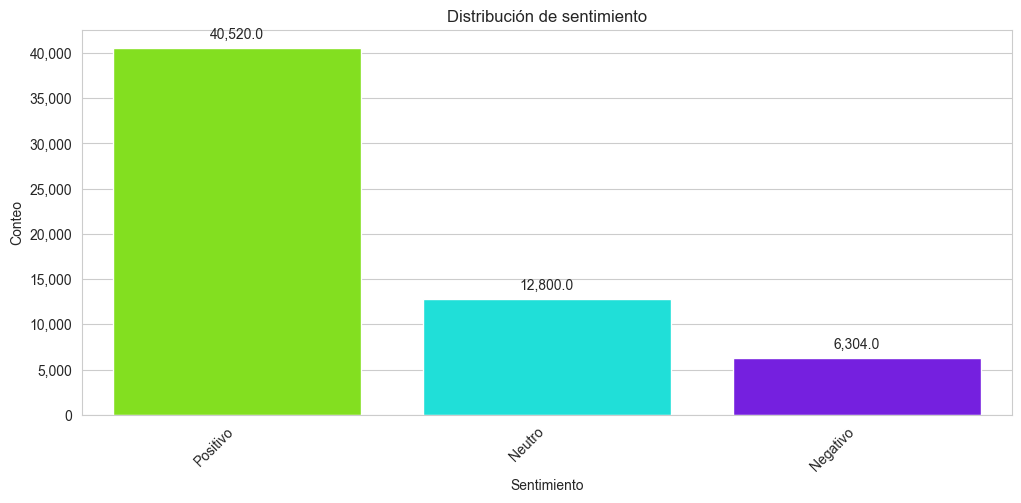

In [10]:
plot_sentiment_analysis(comments_df, 'sentimiento')

* El 69 % de los comentarios son positivos, los resultados hablan por si solos, la gran mayoría de las personas que comentan los videos de __Free Cover__ expresan sentimientos positivos, debido al carisma y actitud contagiosa de los artistas que se presentan para cantar y tocar sus instrumentos.


* Los comentarios "Neutros" en su mayoría son consultas, y peticiones de nuevos artistas invitados.


* Por supuesto que existen comentarios negativos de personas a las que no les gusta el contenido, sin embargo, y para fortuna de los creadores del canal, estos representan cerca de un 6 % de los comentarios.


* El modelo utilizado tiene un "Macro F1 Score" de sobre 70 % en tareas de analisis de sentimiento en texto en español, por lo que como vimos en algunos ejemplos, parte de los comentarios son clasificados de manera erronea.

In [10]:
from datetime import datetime

def remove_timezone(dt):
    """Remove timezone information from a datetime object."""
    if dt.tzinfo is not None:
        dt = dt.replace(tzinfo=None)
    return dt

comments_df['video_date'] = comments_df['video_date'].apply(remove_timezone)
comments_df['comment_date'] = comments_df['video_date'].apply(remove_timezone)

nombre_archivo = 'Comentarios-FreeCover-Sentimiento(v3_pysentimiento).xlsx'
comments_df.to_excel(nombre_archivo)

## Relación Positivo vs Negativo

Ahora veamos los dos videos con mejor y peor relación de comentarios positivos a negativos. Creemos entonces una función que nos ayude con eso:

In [5]:
def plot_best_worst_videos(df):
    """
    Función que grafica los dos videos con la mayor y menor proporción positiva a negativa de comentarios en un DataFrame.

    Argumentos:
        df: un DataFrame de pandas que contiene los datos de comentarios de los videos.

    Retorno:
        No devuelve ningún valor, pero muestra el gráfico de pastel generado con matplotlib.
    """

    df = df.dropna()

    # Calcula la proporción positiva a negativa de comentarios para cada video
    video_sentiment = df.groupby('video_title')['sentimiento'].value_counts(normalize=True).unstack().fillna(0)
    video_sentiment['ratio'] = video_sentiment['Positivo'] / video_sentiment['Negativo']
    
    # Check if any video has no negative comments
    has_no_negative = (video_sentiment['Negativo'] == 0).any()
    
    if has_no_negative:
        # Select the video with the highest positive-to-negative ratio that has at least one negative comment
        video_sentiment_filtered = video_sentiment[video_sentiment['Negativo'] > 0]
        best_video = video_sentiment_filtered['ratio'].idxmax()
        worst_video = video_sentiment_filtered['ratio'].idxmin()
    else:
        # Select the videos with the highest and lowest positive-to-negative ratios
        best_video = video_sentiment['ratio'].idxmax()
        worst_video = video_sentiment['ratio'].idxmin()
    
    best_ratio = video_sentiment.loc[best_video, 'ratio']
    worst_ratio = video_sentiment.loc[worst_video, 'ratio']

    # Filtra los comentarios de los dos videos seleccionados
    best_comments = df[df['video_title'] == best_video]
    worst_comments = df[df['video_title'] == worst_video]

    # Configuración de los colores
    colors = ['#3CB371', '#4169E1', '#FF6347']
    labels = ['Positivo', 'Neutro', 'Negativo']

    # Grafica la distribución de sentimientos de los dos videos con pastel
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
    plt.suptitle(f"Mejor y peor video (proporción pos/neg: {best_ratio:.2f} / {worst_ratio:.2f})", fontsize=16)
    
    # Grafica pastel para el mejor video
    best_data = best_comments['sentimiento'].value_counts(normalize=True)
    ax1.pie(best_data, colors=colors, startangle=90, autopct='%1.1f%%', labels=labels)
    ax1.set_title(f"Mejor video: {best_video}")
    
    # Grafica pastel para el peor video
    worst_data = worst_comments['sentimiento'].value_counts(normalize=True)
    ax2.pie(worst_data, colors=colors, startangle=90, autopct='%1.1f%%', labels=labels)
    ax2.set_title(f"Peor video: {worst_video}")

    plt.show()


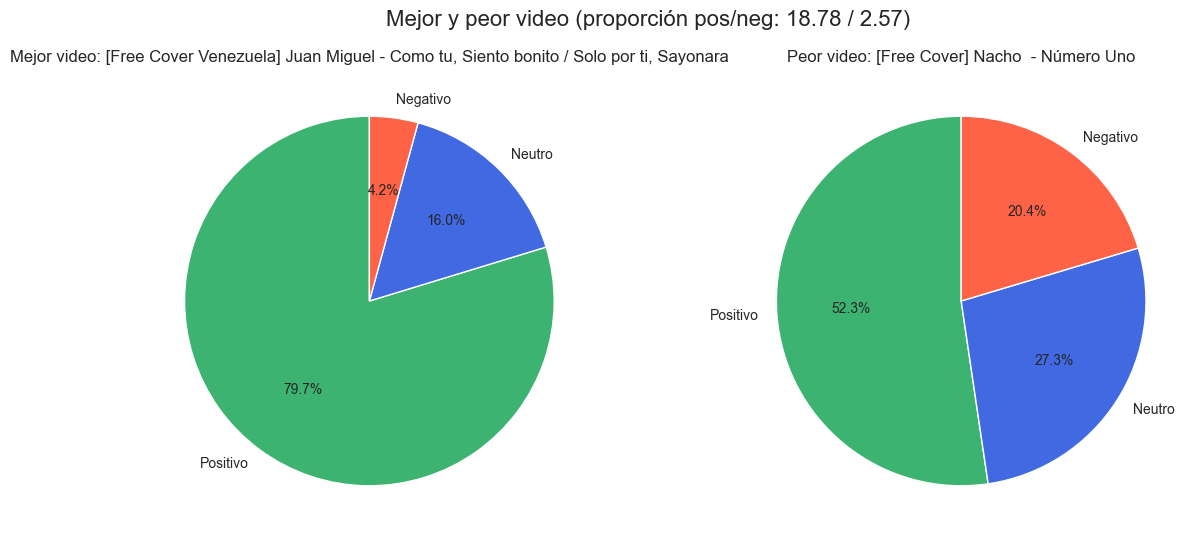

In [12]:
plot_best_worst_videos(comments_df)

* El video con la mejor relación de comentarios positivos a negativos es el video __[Free Cover Venezuela] Juan Miguel - como tú, SIento bonito / Solo por tí, Sayonara__, con una tasa de 18,78 comentarios positivos por cada comentario negativo. Sin embargo, este video es uno de los que menos comentarios tiene, por lo que modificaremos la función para que filtre los videos con menos de 1000 comentarios y los deje fuera.

In [29]:
def plot_best_worst_videos(df, columna):
    """
    Función que grafica los dos videos con la mayor y menor proporción positiva a negativa de comentarios en un DataFrame.

    Argumentos:
        df: un DataFrame de pandas que contiene los datos de comentarios de los videos.

    Retorno:
        No devuelve ningún valor, pero muestra el gráfico de pastel generado con matplotlib.
    """

    df = df.dropna()

    # Filtra los videos con menos de 1000 comentarios
    df = df.groupby('video_title').filter(lambda x: len(x) >= 1000)

    # Calcula la proporción positiva a negativa de comentarios para cada video
    video_sentiment = df.groupby('video_title')[columna].value_counts(normalize=True).unstack().fillna(0)
    video_sentiment['ratio'] = video_sentiment['Positivo'] / video_sentiment['Negativo']
    
    # Check if any video has no negative comments
    has_no_negative = (video_sentiment['Negativo'] == 0).any()
    
    if has_no_negative:
        # Select the video with the highest positive-to-negative ratio that has at least one negative comment
        video_sentiment_filtered = video_sentiment[video_sentiment['Negativo'] > 0]
        best_video = video_sentiment_filtered['ratio'].idxmax()
        worst_video = video_sentiment_filtered['ratio'].idxmin()
    else:
        # Select the videos with the highest and lowest positive-to-negative ratios
        best_video = video_sentiment['ratio'].idxmax()
        worst_video = video_sentiment['ratio'].idxmin()
    
    best_ratio = video_sentiment.loc[best_video, 'ratio']
    worst_ratio = video_sentiment.loc[worst_video, 'ratio']

    # Filtra los comentarios de los dos videos seleccionados
    best_comments = df[df['video_title'] == best_video]
    worst_comments = df[df['video_title'] == worst_video]

    # Configuración de los colores
    colors = ['#3CB371', '#4169E1', '#FF6347']
    labels = ['Positivo', 'Neutro', 'Negativo']

    # Grafica la distribución de sentimientos de los dos videos con pastel
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
    plt.suptitle(f"Mejor y peor video (proporción pos/neg: {best_ratio:.2f} / {worst_ratio:.2f})", fontsize=16)
    
    # Grafica pastel para el mejor video
    best_data = best_comments[columna].value_counts(normalize=True)
    ax1.pie(best_data, colors=colors, startangle=90, autopct='%1.1f%%', labels=labels)
    ax1.set_title(f"Mejor video: {best_video}")
    
    # Grafica pastel para el peor video
    worst_data = worst_comments[columna].value_counts(normalize=True)
    ax2.pie(worst_data, colors=colors, startangle=90, autopct='%1.1f%%', labels=labels)
    ax2.set_title(f"Peor video: {worst_video}")

    plt.show()


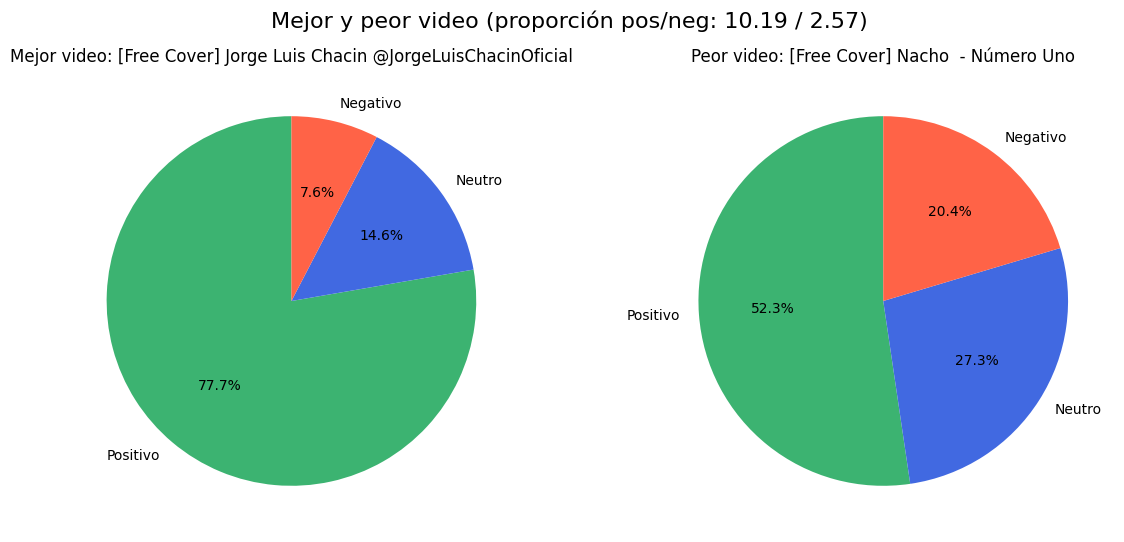

In [15]:
plot_best_worst_videos(comments_df)

# Fine-tuning

In [25]:
fine_tune_comments_xls = 'Comentarios_clasificados_fine-tuned-FreeCover.csv'
fine_tune_comments_path = os.path.join('Comentarios',fine_tune_comments_xls)
fine_tune_comments_df = pd.read_csv(fine_tune_comments_path, index_col=0, encoding='latin1')
fine_tune_comments_df['fine-tuned_label'] = fine_tune_comments_df['fine-tuned_label'].apply(reemplazar)
# fine_tune_comments_df['manual_label'] = fine_tune_comments_df['manual_label'].apply(reemplazar)

In [17]:
fine_tune_comments_df[fine_tune_comments_df['comment_text'].str.contains('nacho')]

,video_id,video_title,video_description,video_date,comment_text,comment_date,sentimiento,manual_label,Diferent,fine-tuned_label
812,Oqcqnxjwp8Q,[Free Cover] Ronald Borjas - Medley,Disfruta de â #FreeCover â en tu plataform...,2018-07-16 02:35:14,para cuando se iran a anotar a ganador chino y...,2018-07-16 02:35:14,NaN,NEU,NO,Positivo
2293,Q2kQbIrEB8I,"[Free Cover] Ricardo Cepeda ""El Colosal"" - Med...",Disfruta de â #FreeCover â en tu plataform...,2018-12-20 20:01:50,aca inicio todo de aqui hasta nacho cuantas co...,2018-12-20 20:01:50,POS,NaN,NO,Positivo
3364,Q2kQbIrEB8I,"[Free Cover] Ricardo Cepeda ""El Colosal"" - Med...",Disfruta de â #FreeCover â en tu plataform...,2018-12-20 20:01:50,como hacen para reunir a los fantasticos me im...,2018-12-20 20:01:50,POS,NaN,NO,Positivo
3730,Q2kQbIrEB8I,"[Free Cover] Ricardo Cepeda ""El Colosal"" - Med...",Disfruta de â #FreeCover â en tu plataform...,2018-12-20 20:01:50,esta gente no juega carrito tienen que hacer ...,2018-12-20 20:01:50,NEU,NaN,NO,Positivo
5739,dYcc91x3B6k,[Free Cover] Rafael Pollo Brito - Homenaje a L...,Disfruta de â #FreeCover â en tu plataform...,2020-02-28 21:05:52,un free cover con nacho por favor los en vivo ...,2020-02-28 21:05:52,NEG,NaN,NO,Positivo
...,...,...,...,...,...,...,...,...,...,...
66632,NESKQr1e8Rs,[Free Cover] Horacio Blanco - Desorden Publico,Disfruta de â #FreeCover â en tu plataform...,2022-12-10 01:00:08,free cover de verdad siempre sorprendiendo con...,2022-12-10 01:00:08,POS,NaN,NO,Neutro
66700,NESKQr1e8Rs,[Free Cover] Horacio Blanco - Desorden Publico,Disfruta de â #FreeCover â en tu plataform...,2022-12-10 01:00:08,faltan los free cover de\nservando y f\ncarame...,2022-12-10 01:00:08,NEU,NaN,NO,Positivo
66961,NESKQr1e8Rs,[Free Cover] Horacio Blanco - Desorden Publico,Disfruta de â #FreeCover â en tu plataform...,2022-12-10 01:00:08,wasmo bateria arrechisimo\nbajista de nacho ar...,2022-12-10 01:00:08,POS,NaN,NO,Positivo
69317,ctbH8KKltNI,[In-Side] Free Cover - Jorge Luis Chacin,Presenta:\nOsman Aray\n\nCamara y Edicion:\nIg...,2022-08-18 17:05:47,me encanto el in side ojala puedan seguir haci...,2022-08-18 17:05:47,POS,NaN,NO,Positivo


In [32]:
fine_tune_comments_df[fine_tune_comments_df['video_title'].str.contains('Nacho')]

,video_id,video_title,video_description,video_date,comment_text,comment_date,sentimiento,manual_label,Diferent,fine-tuned_label
51790,TvPPy_utkkc,[Free Cover] Nacho - NÃºmero Uno,Disfruta de â #FreeCover â en tu plataform...,2022-12-22 00:00:09,nacho partiendola como siempre,2022-12-22 00:00:09,NaN,NaN,SI,Positivo
51791,TvPPy_utkkc,[Free Cover] Nacho - NÃºmero Uno,Disfruta de â #FreeCover â en tu plataform...,2022-12-22 00:00:09,espectacular,2022-12-22 00:00:09,POS,NaN,NO,Positivo
51792,TvPPy_utkkc,[Free Cover] Nacho - NÃºmero Uno,Disfruta de â #FreeCover â en tu plataform...,2022-12-22 00:00:09,lo maximo,2022-12-22 00:00:09,POS,NaN,NO,Positivo
51793,TvPPy_utkkc,[Free Cover] Nacho - NÃºmero Uno,Disfruta de â #FreeCover â en tu plataform...,2022-12-22 00:00:09,creo que hasta se me quito la arrechera que le...,2022-12-22 00:00:09,POS,NaN,NO,Neutro
51794,TvPPy_utkkc,[Free Cover] Nacho - NÃºmero Uno,Disfruta de â #FreeCover â en tu plataform...,2022-12-22 00:00:09,mierda es de los free cover mas arrechos que h...,2022-12-22 00:00:09,POS,NaN,NO,Positivo
...,...,...,...,...,...,...,...,...,...,...
54311,TvPPy_utkkc,[Free Cover] Nacho - NÃºmero Uno,Disfruta de â #FreeCover â en tu plataform...,2022-12-22 00:00:09,aqui esperando para ver a mi loquito preferido...,2022-12-22 00:00:09,POS,NaN,NO,Positivo
54312,TvPPy_utkkc,[Free Cover] Nacho - NÃºmero Uno,Disfruta de â #FreeCover â en tu plataform...,2022-12-22 00:00:09,se viene esta verguita,2022-12-22 00:00:09,NaN,NaN,SI,Positivo
54313,TvPPy_utkkc,[Free Cover] Nacho - NÃºmero Uno,Disfruta de â #FreeCover â en tu plataform...,2022-12-22 00:00:09,saludos estamos pendientes desde cordero tachira,2022-12-22 00:00:09,NEU,NaN,NO,Positivo
54314,TvPPy_utkkc,[Free Cover] Nacho - NÃºmero Uno,Disfruta de â #FreeCover â en tu plataform...,2022-12-22 00:00:09,level up,2022-12-22 00:00:09,NEU,NaN,NO,Positivo


In [43]:
fine_tune_comments_df[fine_tune_comments_df['fine-tuned_label']=='Negativo'].shape

(0, 10)

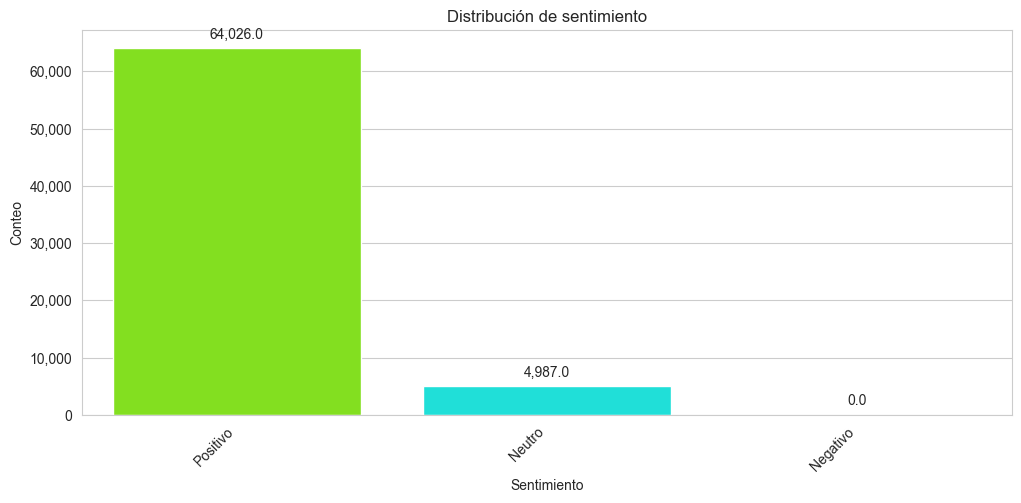

In [34]:
plot_sentiment_analysis(fine_tune_comments_df, 'fine-tuned_label')